### Teoria chaosu
#### Co to jest chaos?
Chaos to zjawisko w fizyce, w którym układ dynamiczny, mimo że jest deterministyczny (czyli jego zachowanie jest opisywane przez ściśle określone prawa fizyczne), wykazuje nieprzewidywalność w dłuższym okresie. Oznacza to, że nawet bardzo małe zmiany w początkowych warunkach mogą prowadzić do diametralnie różnych wyników. Choć teoretycznie możemy poznać prawa rządzące tymi układami, w praktyce ich długoterminowe zachowanie staje się nieprzewidywalne.

#### Cechy układów chaotycznych
1. Deterministyczność: Układy chaotyczne są deterministyczne, co oznacza, że ich zachowanie jest określone przez ścisłe prawa fizyczne. W teorii, znając początkowe warunki, możemy przewidzieć przyszłość układu, ale w rzeczywistości błędy w dokładności tych danych prowadzą do błędów w prognozach.

2. Wrażliwość na warunki początkowe (efekt motyla): Układy chaotyczne są bardzo wrażliwe na początkowe warunki. Oznacza to, że drobne zmiany w początkowych wartościach (np. pozycji, prędkości) prowadzą do zupełnie innych trajektorii. Ten efekt jest znany jako "efekt motyla", który mówi, że trzepotanie skrzydeł motyla w Brazylii może teoretycznie wywołać tornado w Teksasie.

3. Atraktory: W przestrzeni fazowej układów chaotycznych, trajektorie układu często koncentrują się wokół specyficznych obszarów, które nazywamy atraktorami. Te atraktory mogą mieć skomplikowane kształty, na przykład, jak w przypadku układu Lorenza, który tworzy kształt przypominający motyla.

#### Przykłady układów chaotycznych
1. Układ Lorenza: Jest to klasyczny przykład układu chaotycznego, który opisuje zmiany temperatury, ciśnienia i prędkości w atmosferze. Układ Lorenza jest najbardziej znany z tego, że generuje chaotyczny, ale deterministyczny atraktor.

2. Wahadło podwójne

### Rekurencyjne sieci neuronowe (RNN)
#### Co to są rekurencyjne sieci neuronowe?
Rekurencyjne sieci neuronowe (RNN) to rodzaj sztucznych sieci neuronowych, które są zaprojektowane specjalnie do pracy z danymi sekwencyjnymi, takimi jak szereg czasowy. W przeciwieństwie do tradycyjnych sieci neuronowych, RNN mają "pętle", które pozwalają na przekazywanie informacji z poprzednich kroków czasowych do kolejnych. Dzięki temu RNN są idealne do analizy danych, które mają zależności czasowe, jak np. dane meteorologiczne, dane z czujników czy serie czasowe w finansach.

#### Zalety RNN w modelowaniu układów dynamicznych
1. Przewidywanie szeregów czasowych: RNN mogą nauczyć się wzorców i zależności w danych szeregach czasowych. Dzięki temu są w stanie przewidywać przyszłe stany układu, nawet jeśli jego zachowanie jest chaotyczne.

2. Modelowanie układów nieliniowych: W przypadku układów chaotycznych, które często są nieliniowe (nie dają się łatwo opisać prostymi równaniami), RNN mogą skutecznie uchwycić złożoną strukturę tych układów.

### Przykład 1: Układ Lorenza
#### Równania Lorenza
Układ Lorenza opisuje zachowanie atmosfery w trzech wymiarach: prędkości cyrkulacji, temperatury i różnicy temperatur w różnych warstwach atmosfery. Jest to układ nieliniowy, a jego równania są wyrażone w postaci:

$$
\frac{dx}{dt} = \sigma(y - x)
$$

$$
\frac{dy}{dt} = x(\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

gdzie 𝑥, 𝑦, 𝑧 są zmiennymi układu, a 𝜎, 𝜌 i 𝛽 to parametry.


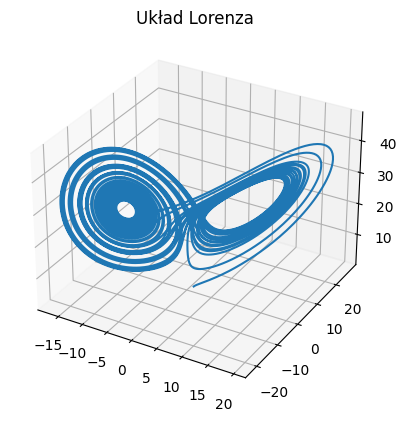

In [12]:
# Symulacja ukladu Lorenza

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parametry układu Lorenza
sigma = 10
rho = 28
beta = 8 / 3

# Funkcja definiująca równania Lorenza
def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Warunki początkowe i czas symulacji
initial_state = [1.0, 1.0, 1.0]
time = np.linspace(0, 40, 10000)

# Rozwiązanie równań
solution = solve_ivp(lorenz, [0, 40], initial_state, t_eval=time)

# Wykres trajektorii w przestrzeni fazowej
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(solution.y[0], solution.y[1], solution.y[2])
ax.set_title("Układ Lorenza")
plt.show()

### Wynik
Trajektoria układu Lorenza tworzy charakterystyczny atraktor, który jest znany jako atraktor Lorenza. Jest to tzw. "motyl", którego kształt można zaobserwować na wykresie 3D.

In [13]:
# Przykład 2: Przewidywanie szeregów czasowych układu Lorenza za pomocą RNN
# Kod trenujący RNN

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Przygotowanie danych treningowych
X = solution.y[:, :-1].T  # Dane wejściowe
Y = solution.y[:, 1:].T   # Dane wyjściowe przesunięte o jeden krok

# Definicja modelu RNN
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(X.shape[1], 1)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
model.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50
313/313 [==============================] - 2s 3ms/step - loss: 131.2297
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 39.1451
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 15.8743
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 8.0169
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 4.4686
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 2.6099
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 1.5840
Epoch 8/50
313/313 [==============================] - 1s 4ms/step - loss: 0.9968
Epoch 9/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6527
Epoch 10/50
313/313 [==============================] - 1s 3ms/step - loss: 0.4469
Epoch 11/50
313/313 [==============================] - 1s 5ms/step - loss: 0.3190
Epoch 12/50
313/313 [==============================] - 1s 4ms/step - loss: 0.2347
Epoch 13/50
313/313 [

### Wizualizacja przewidywań sieci
Po przetrenowaniu modelu RNN możemy porównać rzeczywistą trajektorię układu Lorenza z przewidywaną trajektorią przez sieć.

313/313 [==============================] - 1s 2ms/step


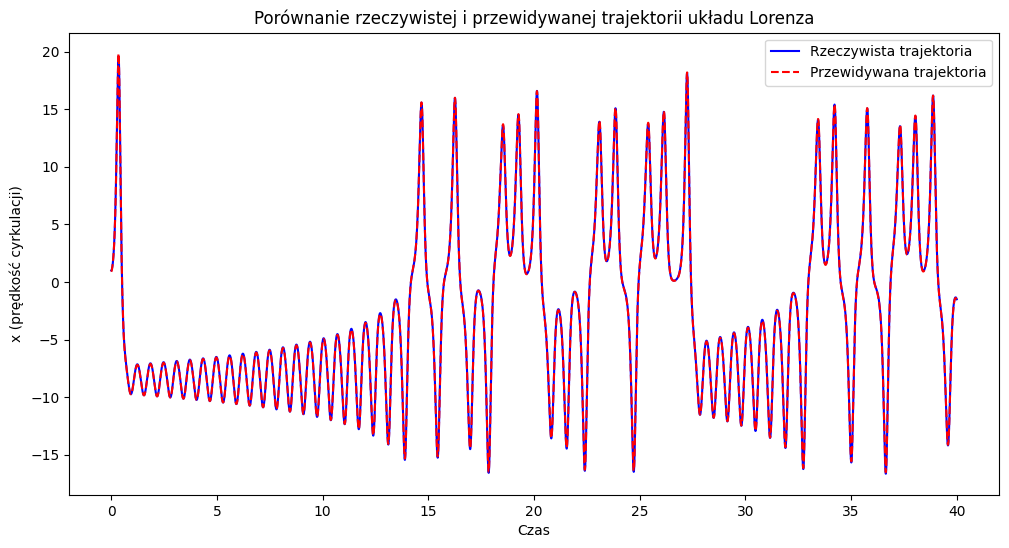

In [14]:
# Predykcja trajektorii
predictions = model.predict(X)

# Wykres porównawczy rzeczywistej i przewidywanej trajektorii
plt.figure(figsize=(12, 6))
plt.plot(solution.t[1:], solution.y[0, 1:], label="Rzeczywista trajektoria", color='b')
plt.plot(solution.t[1:], predictions[:, 0], label="Przewidywana trajektoria", color='r', linestyle='dashed')
plt.xlabel("Czas")
plt.ylabel("x (prędkość cyrkulacji)")
plt.legend()
plt.title("Porównanie rzeczywistej i przewidywanej trajektorii układu Lorenza")
plt.show()


Shape of X for prediction: (9999, 3)
313/313 [==============================] - 1s 2ms/step


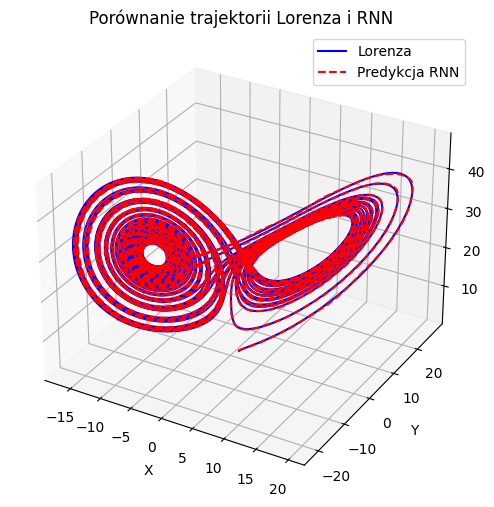

In [15]:
# Przygotowanie danych wejściowych do modelu RNN
# Zakładając, że X ma kształt (czas_steps, cechy)
# Trzeba je przekształcić w odpowiedni format (batch_size, timesteps, features)
X = solution.y[:, :-1].T  # Dane wejściowe, bez ostatniego elementu
# X = X.reshape((X.shape[0], X.shape[1], 1))  # Przekształcamy do kształtu (batch_size, timesteps, features)

# Sprawdzanie kształtu danych
print(f"Shape of X for prediction: {X.shape}")

# Predykcja trajektorii na podstawie modelu RNN
predicted_trajectory = model.predict(X)


# Wykres porównawczy trajektorii
fig = plt.figure(figsize=(12, 6))

# Tworzymy podwykresy (subplots)
ax = fig.add_subplot(111, projection='3d')

# Rzeczywista trajektoria układu Lorenza
ax.plot(solution.y[0], solution.y[1], solution.y[2], label='Lorenza', color='b')

# Predykowana trajektoria przez RNN
ax.plot(predicted_trajectory[:, 0], predicted_trajectory[:, 1], predicted_trajectory[:, 2], label='Predykcja RNN', color='r', linestyle='dashed')

# Ustawienia osi
ax.set_title("Porównanie trajektorii Lorenza i RNN")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Wyświetlanie wykresu
plt.show()


### Symulacja wahadła podwójnego

In [16]:
# Generowanie wielu trajektorii wahadła podwójnego

import numpy as np
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split

# Definicja równań ruchu wahadła podwójnego
def equations(t, y):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)

    theta1_dot = z1
    z1_dot = (m2 * g * np.sin(theta2) * c - m2 * s * (L1 * z1**2 * c + L2 * z2**2) -
              (m1 + m2) * g * np.sin(theta1)) / L1 / (m1 + m2 * s**2)
    theta2_dot = z2
    z2_dot = ((m1 + m2) * (L1 * z1**2 * s - g * np.sin(theta2) + g * np.sin(theta1) * c) +
              m2 * L2 * z2**2 * s * c) / L2 / (m1 + m2 * s**2)
    return [theta1_dot, z1_dot, theta2_dot, z2_dot]

# Parametry wahadła
m1, m2 = 1.0, 1.0  # masy wahadeł
L1, L2 = 1.0, 1.0  # długości prętów
g = 9.81  # przyspieszenie ziemskie

# Zakres czasu symulacji
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

num_trajectories = 100  # liczba trajektorii do wygenerowania
trajectories = []

for i in range(num_trajectories):
    # Losowe warunki początkowe
    y0 = [np.pi + np.random.uniform(-1.0, 1.0), 0, np.pi + np.random.uniform(-1.0, 1.0), 0]
    sol = solve_ivp(equations, t_span, y0, t_eval=t_eval)
    trajectories.append(np.column_stack((sol.y[0], sol.y[1], sol.y[2], sol.y[3])))

# Konwersja listy trajektorii do tablicy numpy
trajectories = np.array(trajectories)

# Przygotowanie danych do modelu RNN
sequence_length = 10  # liczba kroków czasowych w sekwencji
X, y = [], []
for traj in trajectories:
    for i in range(len(traj) - sequence_length):
        X.append(traj[i:i + sequence_length])
        y.append(traj[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Podział na zbiór treningowy i testowy
split_index = int(len(X) * 0.2)
# Podział na zbiór treningowy i testowy
X_test, y_test = X[:split_index], y[:split_index]
X_train, y_train = X[split_index:], y[split_index:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (79200, 10, 4)
Shape of y_train: (79200, 4)
Shape of X_test: (19800, 10, 4)
Shape of y_test: (19800, 4)


### Modelowanie RNN dla wahadła podwójnego

In [17]:
import os
import tensorflow as tf

# Define the model save path
model_save_path = "rnn_model.h5"

# Check if the model is already saved
if os.path.exists(model_save_path):
    # Load the model if it exists
    model = tf.keras.models.load_model(model_save_path)
    print("Model loaded from disk.")
else:
    # Build and train the model if it doesn't exist
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(sequence_length, X_train.shape[2])),
        tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences=True),
        tf.keras.layers.SimpleRNN(64, activation='tanh'),
        tf.keras.layers.Dense(y_train.shape[1])
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Save the model to disk
    model.save(model_save_path)
    print("Model trained and saved to disk.")


Epoch 1/50
1980/1980 [==============================] - 18s 8ms/step - loss: 11.9980 - mae: 1.2612 - val_loss: 0.3249 - val_mae: 0.3800
Epoch 2/50
1980/1980 [==============================] - 16s 8ms/step - loss: 0.7377 - mae: 0.2970 - val_loss: 0.1643 - val_mae: 0.2433
Epoch 3/50
1980/1980 [==============================] - 16s 8ms/step - loss: 0.2160 - mae: 0.2230 - val_loss: 0.1042 - val_mae: 0.2006
Epoch 4/50
1980/1980 [==============================] - 16s 8ms/step - loss: 0.1101 - mae: 0.1881 - val_loss: 0.0744 - val_mae: 0.1903
Epoch 5/50
1980/1980 [==============================] - 17s 8ms/step - loss: 0.1151 - mae: 0.2031 - val_loss: 0.0765 - val_mae: 0.1846
Epoch 6/50
1980/1980 [==============================] - 18s 9ms/step - loss: 0.0873 - mae: 0.1759 - val_loss: 0.2274 - val_mae: 0.3047
Epoch 7/50
1980/1980 [==============================] - 16s 8ms/step - loss: 0.1211 - mae: 0.2146 - val_loss: 0.1473 - val_mae: 0.2469
Epoch 8/50
1980/1980 [==============================] 

/home/kieru/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model trained and saved to disk.


619/619 [==============================] - 3s 5ms/step


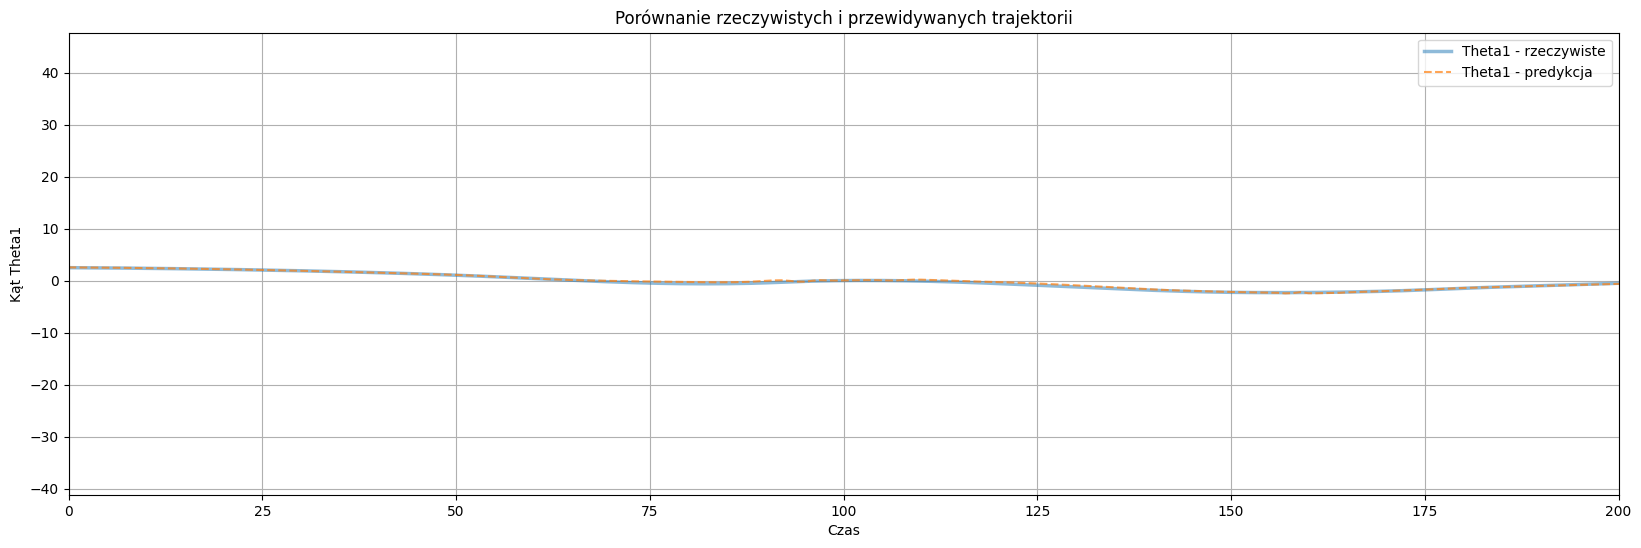

In [18]:
# Przewidywanie trajektorii
y_pred = model.predict(X_test)

# Porównanie trajektorii
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_test[:, 0], label='Theta1 - rzeczywiste', alpha=0.5, linewidth=2.5)
plt.plot(y_pred[:, 0], label='Theta1 - predykcja', linestyle='dashed', alpha=0.7) 
plt.title('Porównanie rzeczywistych i przewidywanych trajektorii')
plt.xlabel('Czas')
plt.ylabel('Kąt Theta1')
plt.xlim(0, 200)
plt.legend()
plt.grid()
plt.show()


  1/619 [..............................] - ETA: 17s

619/619 [==============================] - 3s 4ms/step


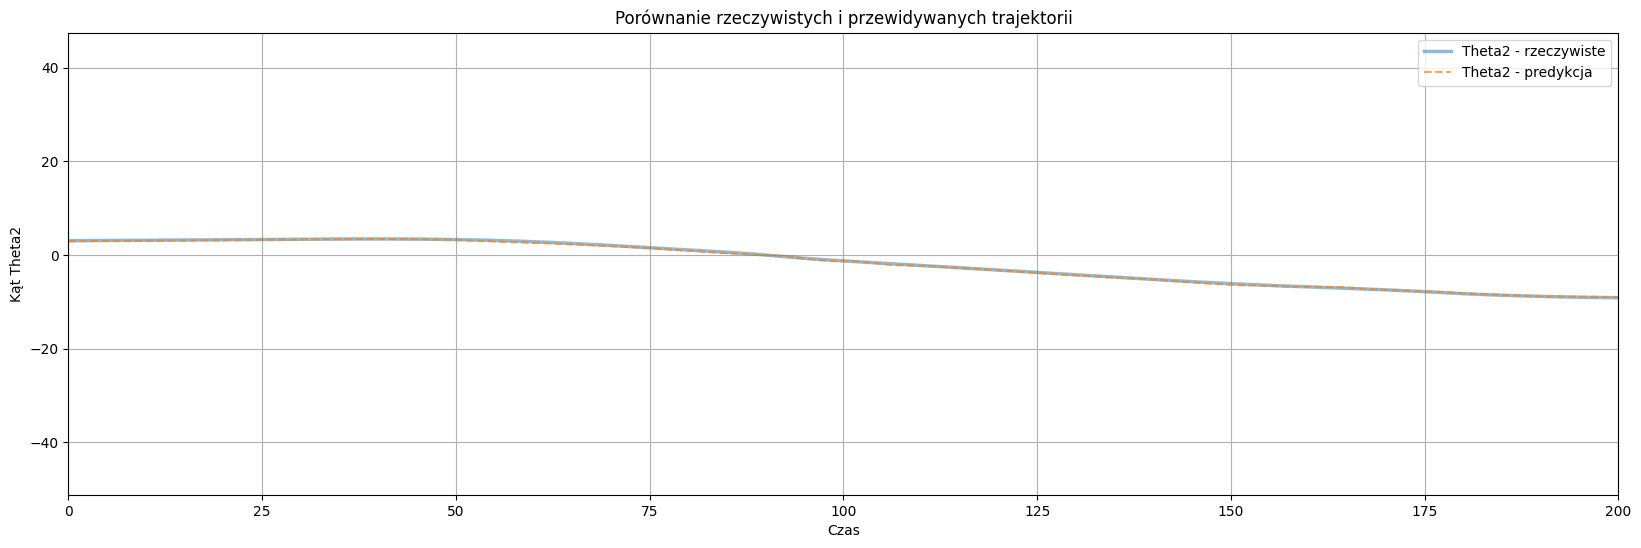

In [19]:
# Przewidywanie trajektorii
y_pred = model.predict(X_test)

# Porównanie trajektorii
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_test[:, 2], label='Theta2 - rzeczywiste', alpha=0.5, linewidth=2.5)
plt.plot(y_pred[:, 2], label='Theta2 - predykcja', linestyle='dashed', alpha=0.7) 
plt.title('Porównanie rzeczywistych i przewidywanych trajektorii')
plt.xlabel('Czas')
plt.ylabel('Kąt Theta2')
plt.xlim(0, 200)
plt.legend()
plt.grid()
plt.show()

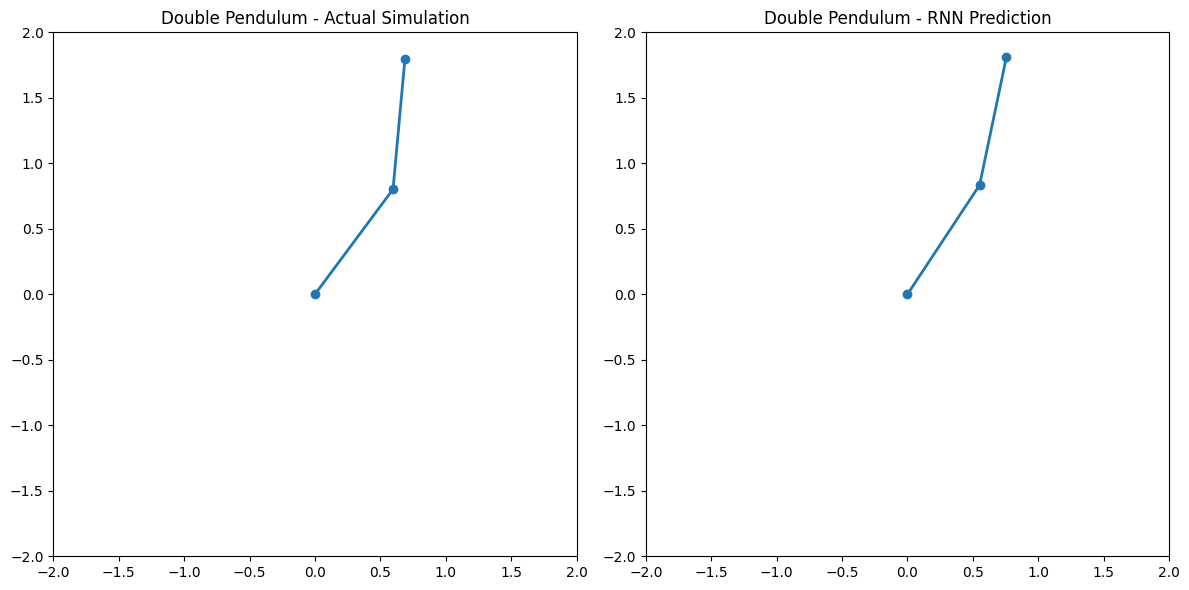

In [20]:
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt

# Function to convert angles to x, y coordinates
def angles_to_coordinates(theta1, theta2, l1, l2):
    x1 = l1 * np.sin(theta1)
    y1 = -l1 * np.cos(theta1)
    x2 = x1 + l2 * np.sin(theta2)
    y2 = y1 - l2 * np.cos(theta2)
    return x1, y1, x2, y2

# Actual pendulum coordinates
real_x1, real_y1, real_x2, real_y2 = angles_to_coordinates(y_test[:, 0], y_test[:, 2], L1, L2)

# Predicted pendulum coordinates from RNN
pred_theta1 = y_pred[:, 0]
pred_theta2 = y_pred[:, 2]

pred_x1, pred_y1, pred_x2, pred_y2 = angles_to_coordinates(pred_theta1[:len(real_x1)], pred_theta2[:len(real_x1)], L1, L2)

# Ensure frames match the shortest dataset
num_frames = min(len(real_x1), len(pred_x1))
num_frames = 400

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-2, 2)
ax[0].set_title("Double Pendulum - Actual Simulation")
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)
ax[1].set_title("Double Pendulum - RNN Prediction")

# Lines for both pendulums
real_line, = ax[0].plot([], [], 'o-', lw=2)
pred_line, = ax[1].plot([], [], 'o-', lw=2)

# Permanent lines for the tips of the pendulums
real_tip_line, = ax[0].plot([], [], 'r-', lw=1)
pred_tip_line, = ax[1].plot([], [], 'r-', lw=1)

# Lists to store the tip coordinates
real_tip_x, real_tip_y = [], []
pred_tip_x, pred_tip_y = [], []

# Update function for the animation
def update(frame):
    # Update real pendulum
    real_line.set_data(
        [0, real_x1[frame], real_x2[frame]],
        [0, real_y1[frame], real_y2[frame]],
    )
    real_tip_x.append(real_x2[frame])
    real_tip_y.append(real_y2[frame])
    real_tip_line.set_data(real_tip_x, real_tip_y)
    
    # Update predicted pendulum
    pred_line.set_data(
        [0, pred_x1[frame], pred_x2[frame]],
        [0, pred_y1[frame], pred_y2[frame]],
    )
    pred_tip_x.append(pred_x2[frame])
    pred_tip_y.append(pred_y2[frame])
    pred_tip_line.set_data(pred_tip_x, pred_tip_y)
    
    return real_line, pred_line, real_tip_line, pred_tip_line

# Create the animation
anim = FuncAnimation(fig, update, frames=num_frames, interval=20, blit=True)

# Display the animation
plt.tight_layout()
plt.show()

# Save the animation as MP4
anim.save('double_pendulum_comparison_extr.mp4', writer='ffmpeg', fps=30)


# **Podsumowanie**

1. Chaos jest często spotykanym zjawiskiem w dynamicznych układach fizycznych.
2. Rekurencyjne sieci neuronowe mogą być skutecznym narzędziem do modelowania i przewidywania zachowań chaotycznych.
3. Modelowanie chaosu może znaleźć zastosowanie w przewidywaniu zjawisk pogodowych, finansowych oraz w analizie układów biologicznych.

**Dziękuję za uwagę!**
